In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 
sns.set_style("white")

In [11]:
pwd

'C:\\Users\\Kriszta\\desktop\\datas'

In [12]:
df=pd.read_csv('stock_px.csv', index_col=0, parse_dates=True )
stocks = df[['AAPL', 'MSFT', 'XOM']]
stocks

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


In [13]:
#Downsampling condenses the data (fewer rows). You need to specify, how the rows should be aggregated:

In [14]:
stocks.resample('W').first()

,AAPL,MSFT,XOM
2003-01-05,7.40,21.11,29.22
2003-01-12,7.45,21.52,29.96
2003-01-19,7.32,22.16,28.91
2003-01-26,7.01,20.17,27.94
2003-02-02,7.07,19.32,26.21
...,...,...,...
2011-09-18,379.94,25.89,71.84
2011-09-25,411.63,27.21,73.70
2011-10-02,403.17,25.44,71.72
2011-10-09,374.60,24.53,71.15


In [15]:
stocks.resample('2W').mean()

,AAPL,MSFT,XOM
2003-01-05,7.425000,21.125000,29.230000
2003-01-19,7.306000,21.729000,29.056000
2003-02-02,7.123333,19.561111,27.384444
2003-02-16,7.231000,18.561000,27.854000
2003-03-02,7.447778,19.036667,28.131111
...,...,...,...
2011-08-21,370.801000,24.844000,71.520000
2011-09-04,378.339000,25.410000,72.947000
2011-09-18,385.845556,26.223333,72.591111
2011-10-02,401.467000,25.733000,72.144000


In [16]:
stocks.resample('M').sum()

,AAPL,MSFT,XOM
2003-01-31,152.02,435.59,595.48
2003-02-28,139.34,356.94,531.72
2003-03-31,153.28,407.30,610.37
2003-04-30,145.40,417.30,610.06
2003-05-31,186.59,418.88,624.30
...,...,...,...
2011-06-30,7283.79,534.58,1746.05
2011-07-31,7444.76,535.98,1643.93
2011-08-31,8665.54,582.31,1680.35
2011-09-30,8242.36,545.35,1520.39


In [17]:
# Upsampling changes the index to a wider timescale (more rows). The resulting gaps need to be filled or interpolated:

In [18]:
stocks.resample('6h').sum()

,AAPL,MSFT,XOM
2003-01-02 00:00:00,7.40,21.11,29.22
2003-01-02 06:00:00,0.00,0.00,0.00
2003-01-02 12:00:00,0.00,0.00,0.00
2003-01-02 18:00:00,0.00,0.00,0.00
2003-01-03 00:00:00,7.45,21.14,29.24
...,...,...,...
2011-10-13 00:00:00,408.43,27.18,76.37
2011-10-13 06:00:00,0.00,0.00,0.00
2011-10-13 12:00:00,0.00,0.00,0.00
2011-10-13 18:00:00,0.00,0.00,0.00


In [19]:
stocks.resample('6h').ffill()

,AAPL,MSFT,XOM
2003-01-02 00:00:00,7.40,21.11,29.22
2003-01-02 06:00:00,7.40,21.11,29.22
2003-01-02 12:00:00,7.40,21.11,29.22
2003-01-02 18:00:00,7.40,21.11,29.22
2003-01-03 00:00:00,7.45,21.14,29.24
...,...,...,...
2011-10-13 00:00:00,408.43,27.18,76.37
2011-10-13 06:00:00,408.43,27.18,76.37
2011-10-13 12:00:00,408.43,27.18,76.37
2011-10-13 18:00:00,408.43,27.18,76.37


In [20]:
# Rolling Windows

In [22]:
stocks = stocks.asfreq('B').fillna(method='ffill')
stocks

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


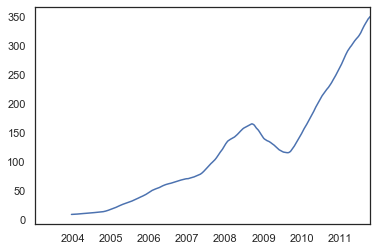

In [23]:
stocks['AAPL'].rolling(250).mean().plot()

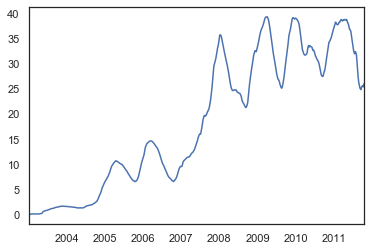

In [24]:
stocks['AAPL'].rolling(250, min_periods=10).std().plot()